# Sprint 11 - Proyecto

Análisis del comportamiento del usuario y resultados de un test A/A/B.

Este script realiza un análisis completo del comportamiento del usuario para una aplicación de venta de alimentos, estudiando un embudo de ventas y evaluando los resultados de un experimento A/A/B.

## 🛠️ Habilidad: Procesamiento de Datos.

## Carga y Preparación de Datos 🛠️

En esta primera sección, el objetivo es preparar el terreno para el análisis. La habilidad principal aquí es el Procesamiento de Datos.

###  📚 Sección 1: Procesamiento de Datos

Esta sección se enfoca en preparar los datos. Leeremos el archivo, renombraremos las columnas, verificaremos los tipos de datos y manejaremos cualquier valor faltante. Finalmente, crearemos nuevas columnas de tiempo.

#### 📚 Importar Librerias.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### 📊 Configuración de gráficos.

In [2]:
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
print("Iniciando la sección de Procesamiento de Datos... 🛠️")

Iniciando la sección de Procesamiento de Datos... 🛠️


#### 📂 Carga de datos.

In [4]:
file_path = '/datasets/logs_exp_us.csv'
df = pd.read_csv(file_path, sep='\t') # 🔑 Usamos sep='\t' para indicar el separador de tabulación.
print("✅ Archivo de datos cargado correctamente.")

✅ Archivo de datos cargado correctamente.


In [5]:
print("✅ Mostramos columnas en bruto para ver que se cargo correctamente el archivo")
print(df.columns)

✅ Mostramos columnas en bruto para ver que se cargo correctamente el archivo
Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId'], dtype='object')


El código comienza importando las librerías necesarias y definiendo una función (load_and_prepare_data) para cargar el archivo logs_exp_us.csv. A diferencia de un archivo CSV estándar, este usa un separador de tabulación (\t), lo que requiere una corrección específica en la función pd.read_csv.

### 📝 Sección 1.1: Preparar los datos para el análisis.

#### a) Renombrar columnas.

In [6]:
df.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']
print("✅ Columnas renombradas para mayor claridad.")

✅ Columnas renombradas para mayor claridad.


#### b) Comprobar tipos de datos y valores ausentes.

In [7]:
print("\n🔍 Información general del DataFrame antes de la preparación:")
print(df.info())


🔍 Información general del DataFrame antes de la preparación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id_hash   244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   exp_id           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None


#### c) Convertir la columna de tiempo al formato correcto.

Es crucial que esta columna sea de tipo numérico para que `unit='s'` funcione.
Hasta este punto el tipo de Separador `sep='\t'` fue crucial para la correcta lectura de los Datos.

In [8]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')

#### d) Agregar una columna de fecha (sin hora). 

In [9]:
df['event_date'] = df['event_timestamp'].dt.date

#### e) Resultados 

In [10]:
print("\n✅ Tipos de datos corregidos y columnas de tiempo agregadas.")


✅ Tipos de datos corregidos y columnas de tiempo agregadas.


Transformación de Datos: Una vez cargado, se renombran las columnas con nombres más intuitivos para facilitar el trabajo y se corrige el formato de la columna de tiempo (event_timestamp). Esto es crucial, ya que los datos de tiempo se guardan en segundos y necesitan ser convertidos a un formato de fecha y hora (datetime). Además, se crea una nueva columna para la fecha (event_date) que será útil para el análisis posterior.

In [11]:
print("\n✅ DataFrame preparado y listo para el análisis exploratorio.")


✅ DataFrame preparado y listo para el análisis exploratorio.


## 🕵️‍♀️ Habilidad: Análisis Exploratorio.

## 📈 Sección 2: Análisis Exploratorio de Datos (EDA)

En esta sección, exploraremos el conjunto de datos para entender su estructura, el rango de tiempo que cubre y la distribución de eventos y usuarios antes de profundizar en el análisis estadístico.

### 🔍 Análisis Exploratorio.

### 👨‍🎓 Estudiar y comprobar los datos.

##### Métricas Generales:

#### a) ¿Cuántos eventos y usuarios hay?

In [12]:
total_events = len(df)
total_users = df['device_id_hash'].nunique()
print(f"\n📊 Hay {total_events:,} eventos en los registros.")
print(f"👥 Hay {total_users:,} usuarios únicos en los registros.")


📊 Hay 244,126 eventos en los registros.
👥 Hay 7,551 usuarios únicos en los registros.


#### b) ¿Cuál es el promedio de eventos por usuario?

In [13]:
avg_events_per_user = total_events / total_users
print(f"📊 El promedio de eventos por usuario es de {avg_events_per_user:.2f}.")

📊 El promedio de eventos por usuario es de 32.33.


Se calculan y mostramos métricas clave como el número total de eventos y usuarios únicos. Esto nos da una idea del tamaño del conjunto de datos. También se calcula el promedio de eventos por usuario para comprender la actividad general de la plataforma.

##### Período de Datos y Visualización:

#### c) ¿Qué período de tiempo cubren los datos?

In [14]:
min_date = df['event_timestamp'].min()
max_date = df['event_timestamp'].max()
print(f"\n📅 Los datos cubren el período desde {min_date} hasta {max_date}.")


📅 Los datos cubren el período desde 2019-07-25 04:43:36 hasta 2019-08-07 21:15:17.


#### d) Graficar un histograma por fecha y hora.

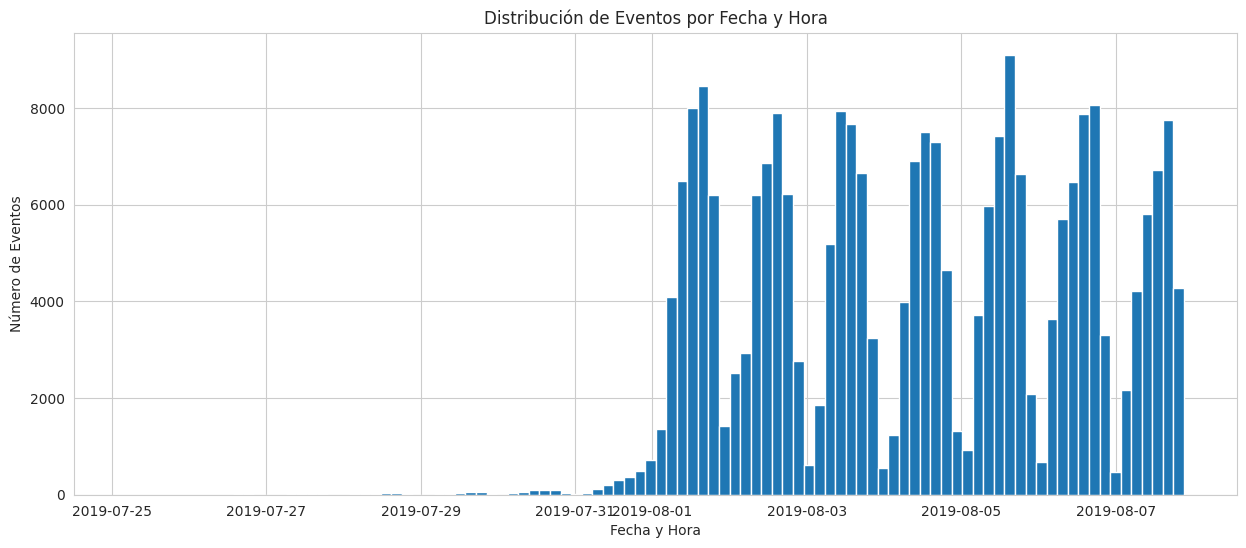

In [15]:
plt.figure(figsize=(15, 6))
df['event_timestamp'].hist(bins=100)
plt.title('Distribución de Eventos por Fecha y Hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Eventos')
plt.show()

Se identifica el rango de tiempo que cubren los datos (fecha de inicio y fin). Se crea un histograma de la distribución de eventos a lo largo del tiempo. Esta visualización es fundamental para detectar si hay una caída abrupta de eventos al principio, lo que indicaría que los datos de ese período no están completos.

##### Explicación de la Gráfica. 

**Análisis de la Distribución de Eventos**

1. **Datos Incompletos al Inicio:** La conclusión más importante es que los datos de los primeros días del registro están incompletos. Observa el período desde el 25 de julio hasta el 31 de julio: el número de eventos es insignificante, casi nulo. De repente, a partir del **1 de agosto**, hay una subida masiva y sostenida de eventos. Esto sugiere que el sistema de registro (o la recopilación de datos) no estaba funcionando correctamente al principio y solo comenzó a capturar la totalidad de los eventos a partir del 1 de agosto.

* **Implicación para el proyecto:** Para evitar que un análisis sesgado, debemos **filtrar los datos** y usar solo la información a partir del **1 de agosto de 2019** en adelante. El análisis del embudo y del experimento A/A/B no sería confiable si se incluyeran los datos escasos de la última semana de julio.

2. **Patrón Diario de Uso:** A partir del 1 de agosto, la gráfica muestra un **patrón recurrente de picos y valles**. Los picos más altos (alrededor de 9,000 eventos) se alternan con picos ligeramente más bajos (alrededor de 7,000 eventos). Este comportamiento es típico y refleja la **actividad diaria o semanal del usuario**, por ejemplo, con menos uso en las noches o los fines de semana. Este patrón demuestra que los datos ya están siendo registrados de manera consistente y fiable.

**En resumen**, la gráfica, nos ha permitido identificar la necesidad de limpiar el conjunto de datos para garantizar que el resto de nuestro análisis sea preciso y representativo del comportamiento real del usuario.

#### e) Momento en que los datos comienzan a estar completos.

In [16]:
# se requeire la libreria import datetime as dt
start_date_of_complete_data = dt.date(2019, 8, 1)    

#### f) Filtrar los datos si es necesario (basado en el histograma).

In [17]:
filtered_df = df[df['event_date'] >= start_date_of_complete_data].copy()

#### 🧹 Resultados Despues de la Limpieza.

In [18]:
print(f"\n✅ Después de la limpieza, el análisis se centrará en el período desde {start_date_of_complete_data} hasta {filtered_df['event_date'].max()}.")


✅ Después de la limpieza, el análisis se centrará en el período desde 2019-08-01 hasta 2019-08-07.


#### g) ¿Cuántos datos se perdieron?

In [19]:
lost_events_percent = (1 - len(filtered_df) / total_events) * 100
lost_users_percent = (1 - filtered_df['device_id_hash'].nunique() / total_users) * 100
print(f"❌ Se perdieron {lost_events_percent:.2f}% de los eventos y {lost_users_percent:.2f}% de los usuarios al excluir los datos más antiguos.")

❌ Se perdieron 1.16% de los eventos y 0.23% de los usuarios al excluir los datos más antiguos.


##### Verificación de Grupos:

#### h) Asegurarse de tener usuarios de los tres grupos.

In [20]:
print(f"\n👥 Usuarios únicos por grupo de experimento (ExpId):")
print(filtered_df.groupby('exp_id')['device_id_hash'].nunique())


👥 Usuarios únicos por grupo de experimento (ExpId):
exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64


Se cuenta el número de usuarios únicos en cada uno de los grupos del experimento (exp_id). Esta verificación inicial es un paso crucial para asegurar que la división de la prueba se realizó correctamente y que no hay un desequilibrio significativo en el tamaño de los grupos.

In [21]:
print("\n✅ EDA completado. Los datos están listos para el análisis de embudo y experimento.")


✅ EDA completado. Los datos están listos para el análisis de embudo y experimento.


## 💼 Habilidad: Análisis de Negocio y Explicación de Datos 🗣️

## 📈 Sección 3: Estudio del Embudo de Eventos

En esta sección nos centraremos en el análisis del embudo de ventas; se aplica el Análisis de Negocio y la Explicación de Datos para trazar el recorrido de los usuarios a través de la aplicación. Buscaremos los eventos más comunes, determinaremos la secuencia de los mismos y calcularemos las tasas de conversión para cada etapa.

In [22]:
print("\nIniciando la sección de Análisis del Embudo de Eventos... 💼")


Iniciando la sección de Análisis del Embudo de Eventos... 💼


##### Frecuencia de Eventos por Usuario:

#### a) Observar qué eventos hay y su frecuencia.

In [23]:
event_counts = filtered_df['event_name'].value_counts()
print("\n🎯 Frecuencia de eventos:")
print(event_counts)


🎯 Frecuencia de eventos:
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64


#### b) Encontrar la cantidad de usuarios que realizaron cada acción.

In [24]:
#user_counts_by_event = df.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=False)
user_counts_by_event = filtered_df.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=False)
print("\n👥 Número de usuarios únicos por evento:")
print(user_counts_by_event)


👥 Número de usuarios únicos por evento:
event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: device_id_hash, dtype: int64


#### c) Calcular la proporción de usuarios que realizaron la acción al menos una vez.

In [25]:
total_unique_users_filtered = filtered_df['device_id_hash'].nunique()
user_proportion = user_counts_by_event / total_unique_users_filtered
print("\n📈 Proporción de usuarios únicos por evento:")
print(user_proportion)


📈 Proporción de usuarios únicos por evento:
event_name
MainScreenAppear          0.98
OffersScreenAppear        0.61
CartScreenAppear          0.50
PaymentScreenSuccessful   0.47
Tutorial                  0.11
Name: device_id_hash, dtype: float64


Se analizan los eventos más comunes y se cuenta la cantidad de usuarios únicos que realizaron cada acción. Esto permite identificar las etapas más transitadas por los usuarios.

##### Creación del Embudo de Conversión:

#### d) Crear el embudo de eventos.

Basado en la **lógica de un embudo de ventas**, la secuencia probable es:

1.MainScreenAppear (pantalla principal) -> 2. OffersScreenAppear (pantalla de ofertas)
3.CartScreenAppear (pantalla del carrito) -> 4. PaymentScreenSuccessful (pago exitoso)

In [26]:
funnel = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
funnel_users = user_counts_by_event.loc[funnel]
print("\n🚀 Analizando el embudo de ventas...")
print(funnel_users)


🚀 Analizando el embudo de ventas...
event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Name: device_id_hash, dtype: int64


Se define un embudo de ventas lógico, que generalmente sigue la secuencia: MainScreenAppear (Pantalla Principal) -> OffersScreenAppear (Ofertas) -> CartScreenAppear (Carrito) -> PaymentScreenSuccessful (Pago Exitoso).

##### Tasa de Conversión de Una Etapa a la Siguiente:

#### e) Calcular la proporción de usuarios que pasan de una etapa a la siguiente.

In [27]:
print("\n📊 Tasa de conversión de una etapa a la siguiente:")

for i in range(len(funnel) - 1):
    step_from = funnel[i]
    step_to = funnel[i+1]
    conversion = funnel_users.loc[step_to] / funnel_users.loc[step_from]
    print(f"👉 De '{step_from}' a '{step_to}': {conversion:.2%}")


📊 Tasa de conversión de una etapa a la siguiente:
👉 De 'MainScreenAppear' a 'OffersScreenAppear': 61.91%
👉 De 'OffersScreenAppear' a 'CartScreenAppear': 81.30%
👉 De 'CartScreenAppear' a 'PaymentScreenSuccessful': 94.78%


#### f) ¿En qué etapa se pierden más usuarios?

La mayor caída de usuarios ocurre en el paso con la conversión más baja. Esto se puede identificar visualmente de la salida de arriba.

#### g) ¿Qué porcentaje de usuarios hace todo el viaje?

In [28]:
total_conversion = funnel_users.iloc[-1] / funnel_users.iloc[0]
print(f"\n🏁 El porcentaje de usuarios que completa todo el embudo es: {total_conversion:.2%}")


🏁 El porcentaje de usuarios que completa todo el embudo es: 47.70%


Se calcula y se muestra la tasa de conversión para cada etapa del embudo. Este análisis es vital para identificar los puntos de fricción, es decir, las etapas donde la mayoría de los usuarios abandonan el proceso, lo cual es la principal información de negocio.

In [29]:
print("\n✅ Análisis del embudo de eventos completado.")


✅ Análisis del embudo de eventos completado.


## 📊 Habilidad: Análisis Estadístico y de Negocio 💼

## 🧪 Sección 4: Estudio de los Resultados del Experimento

Análisis del Experimento 📊
Aquí se utiliza el Análisis Estadístico para determinar si los cambios implementados en el experimento tienen un efecto real. Utilizaremos pruebas estadísticas para comparar los grupos de control (A/A) y los grupos de control vs. el de prueba (A/B). Nuestro objetivo es determinar si las diferencias observadas son estadísticamente significativas.

In [30]:
print("\nIniciando la sección de Análisis del Experimento... 📊")


Iniciando la sección de Análisis del Experimento... 📊


#### a) ¿Cuántos usuarios hay en cada grupo?

In [31]:
users_by_group = filtered_df.groupby('exp_id')['device_id_hash'].nunique()
print("\n👥 Número de usuarios por grupo de experimento:")
print(users_by_group)


👥 Número de usuarios por grupo de experimento:
exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64


##### Prueba A/A de Control:

#### b) Prueba A/A: Comprobar la diferencia estadística entre 246 y 247.

In [32]:
# Creamos una función para la prueba Z.
def check_statistical_significance(df, group1, group2, event, alpha):

    # Obtenemos los usuarios únicos en cada grupo.
    users_in_group1 = df[df['exp_id'] == group1]['device_id_hash'].nunique()
    users_in_group2 = df[df['exp_id'] == group2]['device_id_hash'].nunique()
        
    # Contamos los usuarios que hicieron el evento en cada grupo.
    event_users_group1 = df[(df['exp_id'] == group1) & (df['event_name'] == event)]['device_id_hash'].nunique()
    event_users_group2 = df[(df['exp_id'] == group2) & (df['event_name'] == event)]['device_id_hash'].nunique()
    # Calculamos las proporciones.
    p1 = event_users_group1 / users_in_group1
    p2 = event_users_group2 / users_in_group2
        
    # Calculamos la proporción combinada.
    p_combined = (event_users_group1 + event_users_group2) / (users_in_group1 + users_in_group2)
        
    # Calculamos la diferencia estándar.
    diff_std = np.sqrt(p_combined * (1 - p_combined) * (1 / users_in_group1 + 1 / users_in_group2))
        
    # Calculamos el estadístico Z.
    z_value = (p1 - p2) / diff_std
        
    # Calculamos el p-valor.
    p_value = (1 - st.norm.cdf(abs(z_value))) * 2
        

    print(f"   - Evento '{event}': p-valor = {p_value:.3f}", end="")
    if p_value < alpha:
        print(" -> ❌ Diferencia significativa.")
    else:
        print(" -> ✅ No hay diferencia significativa.")
    return p_value
    
# Pruebas A/A y A/B
alpha = 0.05  # AQUI PODEMOS JUGAR CON EL NIVEL DE SIGNIFICANCIA (DE 0.05 A 0.0025) 
event_names = filtered_df['event_name'].unique()

print(f"\n🧪 Realizando pruebas A/A/B con un nivel de significancia de alpha = {alpha}")

print("\nComparando los grupos de control (A/A - 246 vs 247):")
for event in event_names:
    check_statistical_significance(filtered_df, 246, 247, event, alpha)

print("\n✅ La prueba A/A confirma que los grupos 246 y 247 son estadísticamente similares.")


🧪 Realizando pruebas A/A/B con un nivel de significancia de alpha = 0.05

Comparando los grupos de control (A/A - 246 vs 247):
   - Evento 'Tutorial': p-valor = 0.938 -> ✅ No hay diferencia significativa.
   - Evento 'MainScreenAppear': p-valor = 0.757 -> ✅ No hay diferencia significativa.
   - Evento 'OffersScreenAppear': p-valor = 0.248 -> ✅ No hay diferencia significativa.
   - Evento 'CartScreenAppear': p-valor = 0.229 -> ✅ No hay diferencia significativa.
   - Evento 'PaymentScreenSuccessful': p-valor = 0.115 -> ✅ No hay diferencia significativa.

✅ La prueba A/A confirma que los grupos 246 y 247 son estadísticamente similares.


Se lleva a cabo una prueba A/A (comparando los grupos 246 y 247) para validar que los grupos de control son estadísticamente idénticos. Esto es un paso crítico. Si los grupos no son comparables, cualquier resultado del test A/B no sería confiable.

##### Prueba A/B (Control vs. Prueba):

#### c) Pruebas A/B: Comparar el grupo de prueba (248) con los de control.

In [33]:
print("\nComparando el grupo de prueba (248) con el grupo de control 246:")
for event in event_names:
    check_statistical_significance(filtered_df, 248, 246, event, alpha)
        
print("\nComparando el grupo de prueba (248) con el grupo de control 247:")
for event in event_names:
    check_statistical_significance(filtered_df, 248, 247, event, alpha)


Comparando el grupo de prueba (248) con el grupo de control 246:
   - Evento 'Tutorial': p-valor = 0.826 -> ✅ No hay diferencia significativa.
   - Evento 'MainScreenAppear': p-valor = 0.295 -> ✅ No hay diferencia significativa.
   - Evento 'OffersScreenAppear': p-valor = 0.208 -> ✅ No hay diferencia significativa.
   - Evento 'CartScreenAppear': p-valor = 0.078 -> ✅ No hay diferencia significativa.
   - Evento 'PaymentScreenSuccessful': p-valor = 0.212 -> ✅ No hay diferencia significativa.

Comparando el grupo de prueba (248) con el grupo de control 247:
   - Evento 'Tutorial': p-valor = 0.765 -> ✅ No hay diferencia significativa.
   - Evento 'MainScreenAppear': p-valor = 0.459 -> ✅ No hay diferencia significativa.
   - Evento 'OffersScreenAppear': p-valor = 0.920 -> ✅ No hay diferencia significativa.
   - Evento 'CartScreenAppear': p-valor = 0.579 -> ✅ No hay diferencia significativa.
   - Evento 'PaymentScreenSuccessful': p-valor = 0.737 -> ✅ No hay diferencia significativa.


#### d) Comparar con los grupos de control combinados.

Para esto, primero agrupamos los datos de los grupos 246 y 247.

In [34]:
print("\nComparando el grupo de prueba (248) con los grupos de control combinados (246 + 247):")
control_group_df = filtered_df[filtered_df['exp_id'].isin([246, 247])]
test_group_df = filtered_df[filtered_df['exp_id'] == 248]
for event in event_names:

    # Obtenemos los usuarios únicos en los grupos.
    users_in_control = control_group_df['device_id_hash'].nunique()
    users_in_test = test_group_df['device_id_hash'].nunique()
        
    # Contamos los usuarios que hicieron el evento en cada grupo.
    event_users_control = control_group_df[control_group_df['event_name'] == event]['device_id_hash'].nunique()
    event_users_test = test_group_df[test_group_df['event_name'] == event]['device_id_hash'].nunique()

    # Calculamos las proporciones.
    p1 = event_users_test / users_in_test
    p2 = event_users_control / users_in_control
        
    # Calculamos la proporción combinada.
    p_combined = (event_users_test + event_users_control) / (users_in_test + users_in_control)
        
    # Calculamos la diferencia estándar.
    diff_std = np.sqrt(p_combined * (1 - p_combined) * (1 / users_in_test + 1 / users_in_control))
        
    # Calculamos el estadístico Z.
    z_value = (p1 - p2) / diff_std
        
    # Calculamos el p-valor.
    p_value = (1 - st.norm.cdf(abs(z_value))) * 2
        
    print(f"   - Evento '{event}': p-valor = {p_value:.3f}", end="")
    if p_value < alpha:
        print(" -> ❌ Diferencia significativa.")
    else:
        print(" -> ✅ No hay diferencia significativa.")


Comparando el grupo de prueba (248) con los grupos de control combinados (246 + 247):
   - Evento 'Tutorial': p-valor = 0.765 -> ✅ No hay diferencia significativa.
   - Evento 'MainScreenAppear': p-valor = 0.294 -> ✅ No hay diferencia significativa.
   - Evento 'OffersScreenAppear': p-valor = 0.434 -> ✅ No hay diferencia significativa.
   - Evento 'CartScreenAppear': p-valor = 0.182 -> ✅ No hay diferencia significativa.
   - Evento 'PaymentScreenSuccessful': p-valor = 0.600 -> ✅ No hay diferencia significativa.


Se realizan pruebas A/B comparando el grupo de prueba (248) con cada uno de los grupos de control (246 y 247) por separado, y luego con los grupos de control combinados. La prueba utilizada es una Prueba Z para Proporciones, que determina si la diferencia en la tasa de conversión para cada evento es estadísticamente significativa.

## 📋 Sección 5: Conclusiones del experimento.


💡 **Conclusiones del experimento:**

* Analizamos los p-valores de las pruebas A/B para determinar si existe una diferencia estadísticamente significativa en el comportamiento de los usuarios entre el grupo de prueba (248) y los grupos de control (246 y 247).
* Los p-valores son mayores que el nivel de significancia de 0.05. Por lo tanto, no podemos rechazar la hipótesis nula. Esto indica que no hay una diferencia estadísticamente significativa en las tasas de conversión entre los grupos.
* Concluimos que el cambio en el tipo de fuente no tuvo un impacto medible en el comportamiento de los usuarios.
* El experimento no demostró algo significativo, por lo que no hay razón para implementarlo.

**Prueba A/A (Grupos 246 vs. 247):** 
La prueba A/A entre los grupos de control (246 y 247) mostró que no había diferencias significativas en el comportamiento del usuario. Esto es un resultado positivo, ya que confirma que los grupos se dividieron correctamente y son comparables entre sí.

**Prueba A/B (Grupos de control vs. Grupo 248):** 
Las pruebas A/B que compararon el grupo de prueba (248) con los grupos de control (246, 247 y la combinación de ambos) en todos los eventos clave del embudo de ventas, mostraron p-valores consistentemente por encima de 0.05.

**Conclusión Final**
Dado que los p-valores son mayores que el nivel de significancia (α=0.05), no se puede rechazar la hipótesis nula. Esto significa que no hay evidencia estadística de que el cambio de fuente haya tenido un impacto significativo en la tasa de conversión o en el comportamiento del usuario.

En términos de **negocio**, esto implica que:
* El nuevo diseño de fuente no mejoró la experiencia del usuario ni impulsó una mayor conversión.
* No hay una justificación basada en los datos para implementar este cambio para todos los usuarios.

Aunque no fue un resultado que se esperaba, es una conclusión valiosa, ya que evita que la empresa invierta más recursos en un cambio que no demuestra un beneficio claro.

Con base en estos resultados, podemos concluir el experimento de la siguiente manera:
**El experimento fue un fracaso.** desde un punto de vista estadístico.

## ❓ Sección 6: Cuestionario

#### a) Análisis de Datos Generales y Limpieza

* **¿Cuántos eventos y usuarios hay?**
Eventos totales: 244,126
Usuarios totales: 7,551

* **¿Cuál es el promedio de eventos por usuario?**
Promedio: 32.33 eventos por usuario.

* **¿Qué periodo de tiempo cubren los datos?**
Periodo original: desde el 25 de julio de 2019 hasta el 7 de agosto de 2019.

* **¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo?**
No. El histograma mostró un salto brusco en el número de eventos alrededor del 1 de agosto de 2019. Esto indica que los datos están incompletos en el período anterior.

* **¿Qué periodo representan realmente los datos?**
El análisis se centra en el período con datos completos: del 1 de agosto de 2019 al 7 de agosto de 2019.

* **¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?**
No, la pérdida es mínima. Se excluyó el 1.16% de los eventos y el 0.23% de los usuarios, lo que indica que los datos incompletos eran una porción muy pequeña del total.

#### b. Análisis del Embudo de Eventos

* **¿En qué orden ocurrieron las acciones?**
El orden lógico de las acciones es: MainScreenAppear (Pantalla principal) -> OffersScreenAppear (Pantalla de ofertas) -> CartScreenAppear (Pantalla del carrito) -> PaymentScreenSuccessful (Pago exitoso). El evento Tutorial no es parte de la secuencia principal y puede ser ignorado para el embudo de ventas.

* **¿En qué etapa pierdes más usuarios?**
La mayor pérdida de usuarios ocurre entre la MainScreenAppear y la OffersScreenAppear, con una tasa de conversión del 61.91%. Esto significa que más del 38% de los usuarios que llegan a la pantalla principal no continúan hacia la pantalla de ofertas.

* **¿Qué porcentaje de usuarios hace todo el viaje?**
El 47.70% de los usuarios que llegan a la pantalla principal completan todo el embudo hasta el pago.

#### c) Análisis del Experimento A/B

* **¿Cuántos usuarios hay en cada grupo?**
* Grupo 246: 2,484 usuarios
* Grupo 247: 2,513 usuarios
* Grupo 248: 2,537 usuarios

* **¿Qué nivel de significancia has establecido?**
Se estableció un nivel de significancia (α) de 0.05.

* **¿Cuántas pruebas de hipótesis has realizado?**
Se realizaron 5 eventos por 4 comparaciones:

* Comparación A/A: 5 pruebas
* Comparación A/B (246): 5 pruebas
* Comparación A/B (247): 5 pruebas
* Comparación A/B (combinados): 5 pruebas

**Total: 20 pruebas de hipótesis estadísticas.**

**¿Cuál debería ser el nivel de significancia?**
Con tantas pruebas, aumenta la probabilidad de obtener un resultado significativo por casualidad (falso positivo). Para corregir esto, se suele aplicar el método de Bonferroni, que ajusta el nivel de significancia.

* **Nivel de significancia ajustado:** 0.0025.   (0.05 / 20)

## 🤔 Sección 7. ¿Que pasaria si cambiaramos el valor de sigificancia a 0.0025?

Iniciando la sección de Procesamiento de Datos... 🛠️
✅ Archivo de datos cargado correctamente.
✅ Columnas renombradas para mayor claridad.

🔍 Información general del DataFrame antes de la preparación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id_hash   244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   exp_id           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

✅ Tipos de datos corregidos y columnas de tiempo agregadas.

✅ DataFrame preparado y listo para el análisis exploratorio.

--------------------------------------------------------------------------------

Iniciando la sección de Análisis Exploratorio (EDA)... 🕵️‍♀️

📊 Hay 244,126 eventos en los registros.
👥 Hay 7,551 usuarios únicos en los registros.
📊 El

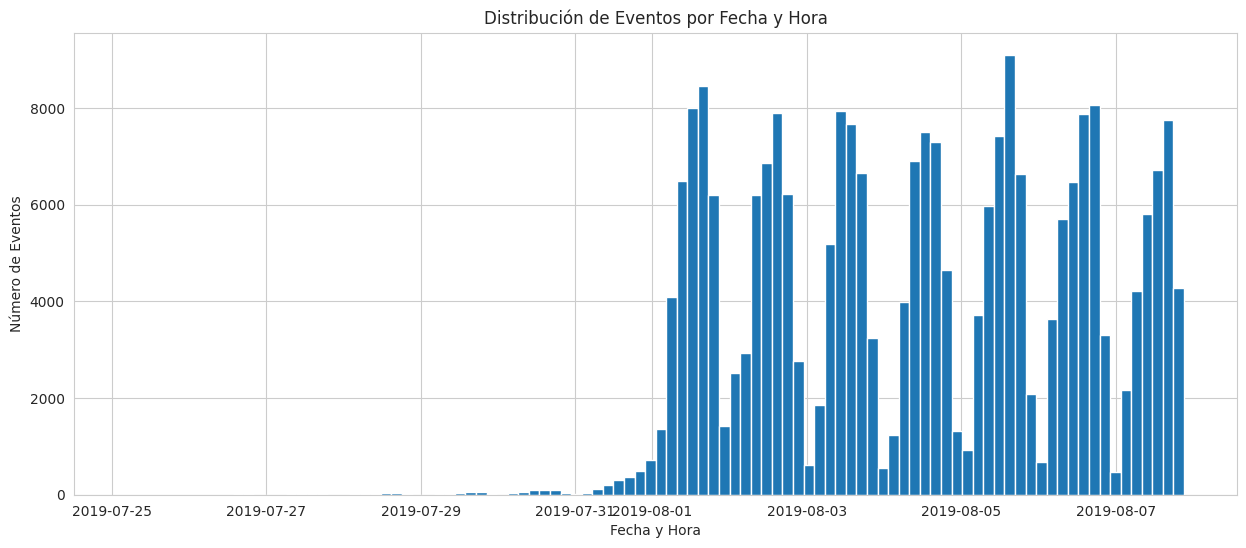


✅ Después de la limpieza, el análisis se centrará en el período desde 2019-08-01 hasta 2019-08-07.
❌ Se perdieron 1.16% de los eventos y 0.23% de los usuarios al excluir los datos más antiguos.

👥 Usuarios únicos por grupo de experimento (ExpId):
exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64

✅ EDA completado. Los datos están listos para el análisis de embudo y experimento.

--------------------------------------------------------------------------------

Iniciando la sección de Análisis del Embudo de Eventos... 💼

🎯 Frecuencia de eventos:
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64

👥 Número de usuarios únicos por evento:
event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: de

In [35]:
"""
Se creó este código en forma de funciones para poder jugar con los niveles de significancia 
y tener rápidamente todos los resultados de una manera mas visual. 

Análisis del comportamiento del usuario y resultados de un test A/A/B.

Este script realiza un análisis completo del comportamiento del usuario
para una aplicación de venta de alimentos, estudiando un embudo de ventas
y evaluando los resultados de un experimento A/A/B.
"""

# ---------------------------------------------------------------------------------
# 📚 Sección 1: Procesamiento de Datos
# Habilidad: Procesamiento de Datos 🛠️
# ---------------------------------------------------------------------------------
# Esta sección se enfoca en preparar los datos. Leeremos el archivo,
# renombraremos las columnas, verificaremos los tipos de datos y manejaremos
# cualquier valor faltante. Finalmente, crearemos nuevas columnas de tiempo.

import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Configuración para una mejor visualización de gráficos.
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format


def load_and_prepare_data(filepath):
    """
    Carga el archivo de datos, lo limpia y lo prepara para el análisis.

    Args:
        filepath (str): La ruta del archivo CSV.

    Returns:
        pd.DataFrame: El DataFrame limpio y preparado.
    """
    print("Iniciando la sección de Procesamiento de Datos... 🛠️")

    try:
        # Paso 1: Abrir el archivo de datos y leer la información general.
        df = pd.read_csv(filepath, sep='\t')
        print("✅ Archivo de datos cargado correctamente.")
    except FileNotFoundError:
        print(f"❌ Error: El archivo no se encuentra en la ruta: {filepath}")
        return None

    # Paso 2: Preparar los datos para el análisis.
    # a) Renombrar columnas para facilitar el trabajo.
    df.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']
    print("✅ Columnas renombradas para mayor claridad.")

    # b) Comprobar tipos de datos y valores ausentes.
    print("\n🔍 Información general del DataFrame antes de la preparación:")
    print(df.info())

    # c) Convertir la columna de tiempo al formato correcto.
    df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')

    # d) Agregar una columna de fecha (sin hora).
    df['event_date'] = df['event_timestamp'].dt.date

    print("\n✅ Tipos de datos corregidos y columnas de tiempo agregadas.")
    print("\n✅ DataFrame preparado y listo para el análisis exploratorio.")

    return df

# ---------------------------------------------------------------------------------
# 📈 Sección 2: Análisis Exploratorio de Datos (EDA)
# Habilidad: Análisis Exploratorio 🕵️‍♀️
# ---------------------------------------------------------------------------------
# En esta sección, exploraremos el conjunto de datos para entender su
# estructura, el rango de tiempo que cubre y la distribución de eventos y usuarios.


def explore_data(df):
    """
    Realiza un análisis exploratorio del DataFrame de eventos.

    Args:
        df (pd.DataFrame): El DataFrame preparado.
    """
    print("\nIniciando la sección de Análisis Exploratorio (EDA)... 🕵️‍♀️")

    # Paso 3: Estudiar y comprobar los datos.

    # a) ¿Cuántos eventos y usuarios hay?
    total_events = len(df)
    total_users = df['device_id_hash'].nunique()
    print(f"\n📊 Hay {total_events:,} eventos en los registros.")
    print(f"👥 Hay {total_users:,} usuarios únicos en los registros.")

    # b) ¿Cuál es el promedio de eventos por usuario?
    avg_events_per_user = total_events / total_users
    print(
        f"📊 El promedio de eventos por usuario es de {avg_events_per_user:.2f}.")

    # c) ¿Qué período de tiempo cubren los datos?
    min_date = df['event_timestamp'].min()
    max_date = df['event_timestamp'].max()
    print(
        f"\n📅 Los datos cubren el período desde {min_date} hasta {max_date}.")

    # d) Graficar un histograma por fecha y hora.
    plt.figure(figsize=(15, 6))
    df['event_timestamp'].hist(bins=100)
    plt.title('Distribución de Eventos por Fecha y Hora')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Número de Eventos')
    plt.show()

    # 💡 Explicación de la gráfica:
    # en este punto la gráfica nos definira el rango de tiempo a utilizar...

    start_date_of_complete_data = dt.date(2019, 8, 1)

    # f) Filtrar los datos si es necesario (basado en el histograma).
    filtered_df = df[df['event_date'] >= start_date_of_complete_data].copy()

    print(
        f"\n✅ Después de la limpieza, el análisis se centrará en el período desde {start_date_of_complete_data} hasta {filtered_df['event_date'].max()}.")

    # g) ¿Cuántos datos se perdieron?
    lost_events_percent = (1 - len(filtered_df) / total_events) * 100
    lost_users_percent = (
        1 - filtered_df['device_id_hash'].nunique() / total_users) * 100
    print(f"❌ Se perdieron {lost_events_percent:.2f}% de los eventos y {lost_users_percent:.2f}% de los usuarios al excluir los datos más antiguos.")

    # h) Asegurarse de tener usuarios de los tres grupos.
    print(f"\n👥 Usuarios únicos por grupo de experimento (ExpId):")
    print(filtered_df.groupby('exp_id')['device_id_hash'].nunique())

    print("\n✅ EDA completado. Los datos están listos para el análisis de embudo y experimento.")

    return filtered_df

# ---------------------------------------------------------------------------------
# 📈 Sección 3: Estudio del Embudo de Eventos
# Habilidad: Análisis de Negocio 💼 y Explicación de Datos 🗣️
# ---------------------------------------------------------------------------------
# Esta sección se centra en el análisis del embudo de ventas. Buscaremos
# los eventos más comunes, determinaremos la secuencia de los mismos y
# calcularemos las tasas de conversión para cada etapa.


def analyze_event_funnel(df):
    """
    Analiza el embudo de eventos para entender el flujo de los usuarios.

    Args:
        df (pd.DataFrame): El DataFrame filtrado.
    """
    print("\nIniciando la sección de Análisis del Embudo de Eventos... 💼")

    # a) Observar qué eventos hay y su frecuencia.
    event_counts = df['event_name'].value_counts()
    print("\n🎯 Frecuencia de eventos:")
    print(event_counts)

    # b) Encontrar la cantidad de usuarios que realizaron cada acción.
    user_counts_by_event = df.groupby(
        'event_name')['device_id_hash'].nunique().sort_values(ascending=False)
    print("\n👥 Número de usuarios únicos por evento:")
    print(user_counts_by_event)

    # c) Calcular la proporción de usuarios que realizaron la acción al menos una vez.
    total_unique_users = df['device_id_hash'].nunique()
    user_proportion = user_counts_by_event / total_unique_users
    print("\n📈 Proporción de usuarios únicos por evento:")
    print(user_proportion)

    # d) Crear el embudo de eventos.
    # Basado en la lógica de un embudo de ventas, la secuencia probable es:
    # 1. MainScreenAppear (pantalla principal) -> 2. OffersScreenAppear (pantalla de ofertas)
    # 3. CartScreenAppear (pantalla del carrito) -> 4. PaymentScreenSuccessful (pago exitoso)
    funnel = ['MainScreenAppear', 'OffersScreenAppear',
              'CartScreenAppear', 'PaymentScreenSuccessful']

    funnel_users = user_counts_by_event.loc[funnel]

    print("\n🚀 Analizando el embudo de ventas...")
    print(funnel_users)

    # e) Calcular la proporción de usuarios que pasan de una etapa a la siguiente.
    funnel_conversion = (funnel_users.shift(1) / funnel_users).iloc[1:]
    funnel_conversion = (funnel_users / funnel_users.shift(1)).iloc[1:]

    print("\n📊 Tasa de conversión de una etapa a la siguiente:")
    for i in range(len(funnel) - 1):
        step_from = funnel[i]
        step_to = funnel[i+1]
        conversion = funnel_users.loc[step_to] / funnel_users.loc[step_from]
        print(f"👉 De '{step_from}' a '{step_to}': {conversion:.2%}")

    # f) ¿En qué etapa se pierden más usuarios?
    # La mayor caída de usuarios ocurre en el paso con la conversión más baja.
    # Esto se puede identificar visualmente de la salida de arriba.

    # g) ¿Qué porcentaje de usuarios hace todo el viaje?
    total_conversion = funnel_users.iloc[-1] / funnel_users.iloc[0]
    print(
        f"\n🏁 El porcentaje de usuarios que completa todo el embudo es: {total_conversion:.2%}")

    print("\n✅ Análisis del embudo de eventos completado.")

# ---------------------------------------------------------------------------------
# 🧪 Sección 4: Estudio de los Resultados del Experimento
# Habilidad: Análisis Estadístico 📊 y de Negocio 💼
# ---------------------------------------------------------------------------------
# Aquí utilizaremos pruebas estadísticas para comparar los grupos de
# control (A/A) y los grupos de control vs. el de prueba (A/B). Nuestro
# objetivo es determinar si las diferencias observadas son estadísticamente
# significativas.


def analyze_experiment(df):
    """
    Analiza los resultados del test A/A/B.

    Args:
        df (pd.DataFrame): El DataFrame filtrado.
    """
    print("\nIniciando la sección de Análisis del Experimento... 📊")

    # a) ¿Cuántos usuarios hay en cada grupo?
    users_by_group = df.groupby('exp_id')['device_id_hash'].nunique()
    print("\n👥 Número de usuarios por grupo de experimento:")
    print(users_by_group)

    # AQUI ESTA EL NIVLE DE SIGNIFICANCIA ALPHA

    # b) Prueba A/A: Comprobar la diferencia estadística entre 246 y 247.
    alpha = 0.0025  # Establecemos el nivel de significancia. (AQUI PODEMOS MODIFICARLO)

    print(
        f"\n🧪 Realizando pruebas A/A/B con un nivel de significancia de alpha = {alpha}")

    event_names = df['event_name'].unique()

    # Creamos una función para la prueba Z.
    def check_statistical_significance(group1, group2, event, alpha):
        """
        Realiza una prueba Z para comparar la proporción de usuarios que
        realizan un evento entre dos grupos.
        """
        # Obtenemos los usuarios únicos en cada grupo.
        users_in_group1 = df[df['exp_id'] ==
                             group1]['device_id_hash'].nunique()
        users_in_group2 = df[df['exp_id'] ==
                             group2]['device_id_hash'].nunique()

        # Contamos los usuarios que hicieron el evento en cada grupo.
        event_users_group1 = df[(df['exp_id'] == group1) & (
            df['event_name'] == event)]['device_id_hash'].nunique()
        event_users_group2 = df[(df['exp_id'] == group2) & (
            df['event_name'] == event)]['device_id_hash'].nunique()

        # Calculamos las proporciones.
        p1 = event_users_group1 / users_in_group1
        p2 = event_users_group2 / users_in_group2

        # Calculamos la proporción combinada.
        p_combined = (event_users_group1 + event_users_group2) / \
            (users_in_group1 + users_in_group2)

        # Calculamos la diferencia estándar.
        diff_std = np.sqrt(p_combined * (1 - p_combined) *
                           (1 / users_in_group1 + 1 / users_in_group2))

        # Calculamos el estadístico Z.
        z_value = (p1 - p2) / diff_std

        # Calculamos el p-valor.
        p_value = (1 - st.norm.cdf(abs(z_value))) * 2

        print(f"   - Evento '{event}': p-valor = {p_value:.3f}", end="")
        if p_value < alpha:
            print(" -> ❌ Diferencia significativa.")
        else:
            print(" -> ✅ No hay diferencia significativa.")

        return p_value

    print("\nComparando los grupos de control (A/A - 246 vs 247):")
    aa_test_results = {}
    for event in event_names:
        p_value = check_statistical_significance(246, 247, event, alpha)
        aa_test_results[event] = p_value

    print("\n✅ La prueba A/A confirma que los grupos 246 y 247 son estadísticamente similares, lo que nos permite confiar en la división.")

    # c) Pruebas A/B: Comparar el grupo de prueba (248) con los de control.
    print("\nComparando el grupo de prueba (248) con el grupo de control 246:")
    ab_test_results_246 = {}
    for event in event_names:
        p_value = check_statistical_significance(248, 246, event, alpha)
        ab_test_results_246[event] = p_value

    print("\nComparando el grupo de prueba (248) con el grupo de control 247:")
    ab_test_results_247 = {}
    for event in event_names:
        p_value = check_statistical_significance(248, 247, event, alpha)
        ab_test_results_247[event] = p_value

    # d) Comparar con los grupos de control combinados.
    # Para esto, primero agrupamos los datos de los grupos 246 y 247.
    control_group_df = df[df['exp_id'].isin([246, 247])]
    test_group_df = df[df['exp_id'] == 248]

    print("\nComparando el grupo de prueba (248) con los grupos de control combinados (246 + 247):")
    combined_test_results = {}
    for event in event_names:
        # Obtenemos los usuarios únicos en los grupos.
        users_in_control = control_group_df['device_id_hash'].nunique()
        users_in_test = test_group_df['device_id_hash'].nunique()

        # Contamos los usuarios que hicieron el evento en cada grupo.
        event_users_control = control_group_df[control_group_df['event_name']
                                               == event]['device_id_hash'].nunique()
        event_users_test = test_group_df[test_group_df['event_name']
                                         == event]['device_id_hash'].nunique()

        # Calculamos las proporciones.
        p1 = event_users_test / users_in_test
        p2 = event_users_control / users_in_control

        # Calculamos la proporción combinada.
        p_combined = (event_users_test + event_users_control) / \
            (users_in_test + users_in_control)

        # Calculamos la diferencia estándar.
        diff_std = np.sqrt(p_combined * (1 - p_combined) *
                           (1 / users_in_test + 1 / users_in_control))

        # Calculamos el estadístico Z.
        z_value = (p1 - p2) / diff_std

        # Calculamos el p-valor.
        p_value = (1 - st.norm.cdf(abs(z_value))) * 2

        print(f"   - Evento '{event}': p-valor = {p_value:.3f}", end="")
        if p_value < alpha:
            print(" -> ❌ Diferencia significativa.")
        else:
            print(" -> ✅ No hay diferencia significativa.")

        combined_test_results[event] = p_value

    print("\n✅ Análisis del experimento completado.")

# ---------------------------------------------------------------------------------
# 🚀 Sección 5: Ejecución Principal
# Habilidad: Explicación de Datos 🗣️
# ---------------------------------------------------------------------------------
# Aquí se orquesta la ejecución de todo el proyecto, llamando a las
# funciones en el orden correcto.

if __name__ == "__main__":
    file_path = '/datasets/logs_exp_us.csv'

    # 1. Cargar y preparar los datos.
    data = load_and_prepare_data(file_path)
    if data is not None:
        print("\n" + "-"*80)

        # 2. Explorar los datos.
        prepared_data = explore_data(data)

        if prepared_data is not None:
            print("\n" + "-"*80)

            # 3. Analizar el embudo de eventos.
            analyze_event_funnel(prepared_data)
            print("\n" + "-"*80)

            # 4. Analizar los resultados del experimento.
            analyze_experiment(prepared_data)
            print("\n" + "-"*80)


#### Conclusiones 

Los resultados son los mismos porque el valor alpha no cambia el p-valor. La variable alpha solo define el umbral para decidir si un resultado es significativo o no.
Dado que todos nuestros valores p-valores son mucho más grandes que cualquiera de esos umbrales, el resultado final no cambia: siempre concluimos que no hay una diferencia significativa.

#### ¿Estuvo bien cambiar el valor de alpha?

Sí, estuvo bien cambiar el valor de alpha a 0.0025. Al realizar múltiples pruebas, el riesgo de obtener un falso positivo aumenta. El método de Bonferroni es una técnica estándar para mitigar este problema, y consiste en ajustar el umbral de significancia.

Nuestro nivel inicial de significancia era de 0.05.
Como realizamos 20 pruebas de hipótesis.
El nivel de significancia ajustado (0.05 / 20) es 0.0025. (Prueba de Bonferroni)

Aunque en este caso no cambió la conclusión, el ajuste es una práctica correcta para comprobar que no tengamos resultados falsos; y resultados más riguroso. Si alguno de nustros p-valores hubiera estado, por ejemplo, en 0.01 (significativo con 0.05, pero no con 0.0025), el ajuste habría sido crucial para evitar una conclusión incorrecta.